In [136]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Load embedding
Decide on big / small embedding to use for analysis

In [137]:
# You do not need to load both embeddings! For test runs, simply load the small embedding. It is much faster!
embeddings_dict = {}

In [2]:
# load big embedding into dictionary
# embedding from http://vectors.nlpl.eu/repository/
# English CoNLL17 corpus
# This takes a while!

# TODO: the binary file seems to be much smaller, maybe that can be used instead?

embeddings_dict_big = {}

counter = 0
errors = []
embeddings_dict = {}
with open("data/40/model.txt", 'r', encoding='ISO-8859-1') as f: # encoding needed for special characters
    for line in f:
        counter += 1
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], "float32")
            embeddings_dict_big[word] = vector
        except:
            errors.append((counter, word)) # save words where the program breaks for some reason

# delete weird entries that have wrong dimensionality for some reason
liste = []
for k, v in embeddings_dict_big.items():
    if np.shape(v)[0] != 100:
        liste.append(k)

for w in liste:
    del embeddings_dict_big[w]
    
# del embeddings_dict["4027169"] # first line is weird

In [138]:
# ALTERNATIVELY: load smol embedding into dictionary
# this is the glove embedding from the authors of the paper
# corpus: wikipedia 2014 + gigaword
# https://nlp.stanford.edu/projects/glove/
embeddings_dict_smol = {}

with open("data/glove.6B.100d.txt", 'r') as f: 
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict_smol[word] = vector

In [139]:
# Choose embedding to work with

embeddings_dict = embeddings_dict_smol
#embeddings_dict = embeddings_dict_big

In [140]:
# 2 x 50 random words to compare the companies against.
random_words_1 = "announcement friend ask pan tail quiet swarm calm glance level tolerate my part devote abortion memorial chaos bleed trench ensure mask create indulge salesperson conservative pier speculate genetic fiction regulation young harvest responsible beach squeeze seek field lip seasonal account complain angel dawn transport observation budge council sunshine farewell slide".split(" ")
random_words_2 = "healthy rage grain surprise trustee prison diagram promise shift escape amputate gallery note stress policeman edge foundation folk squeeze deck misery partnership distinct title hostage rate conspiracy sandwich abridge night old flourish crack angel example fibre urine courtship tragedy prove reform bush breakdown huge technology strip treat meal dignity wife".split(" ")
random_words = random_words_1 + random_words_2

### Helper functions

In [141]:
# function for finding closest words to one embedding
# warning : very slow!
# can be changed to spatial.distance.euclidean

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.cosine(embeddings_dict[word], embedding))

In [142]:
# returns angle between two vectors / lists / arrays
def angle_vec(vec1, vec2): 
    dot_product = np.dot(
        np.array(vec1) / np.linalg.norm(np.array(vec1)),
        np.array(vec2) / np.linalg.norm(np.array(vec2))
    )
    return np.degrees(np.arccos(dot_product))

### Companies, frameworks and sentiment-words

In [143]:
companies = ["Google", "Microsoft", "amazon", "Facebook",
             "Intel", "Nvidia", "AMD", "Deepmind", "IBM",
             "Boston", "Dynamics", "Softbank ", "Robotics",
             "PAL", " Robotics", "Willow", "Garage",
             "Alibaba", " Cloud", "H20.ai", "Bosch",
             "SPHERO", "ANYBOTS", "sarcos", "BARRETT",
             "PETRONICS", "dronesense", "embodied",
             "energid" , "irobot", "myomo", "vecna"]

companies = [name.lower().replace(" ","") for name in companies]


frameworks = ["Sci-kit", "Tensorflow", "Theano", "Caffe", "Keras", "Torch", "MicrosoftCNTK",
             "OpenCV", "ROS", "OpenNN", "MxNet", "Amazon", "Matlab", "Accord.NET",
             "Spark","Mllib", "MLPack", "Apche", "Mahout", "Firebase", "Singa",
             "Azure", "Google", "H20", "YARP", "MRPT", "Gazebo",
             "OROCOS", "Spacy", "Facebook", "Gensim"]

frameworks = [name.lower().replace(" ","") for name in frameworks]

In [144]:
# view which companies are not in the embedding

for i in companies:
    try:
        embeddings_dict[i]
        print('%-15s%-15s' % (i, "True"))
    except:
        print('%-15s%-15s' % (i, "False"))
    # look at "printf-style String Formatting" in https://docs.python.org/3/library/stdtypes.html for info about nice formatting

google         True           
microsoft      True           
amazon         True           
facebook       True           
intel          True           
nvidia         True           
amd            True           
deepmind       False          
ibm            True           
boston         True           
dynamics       True           
softbank       True           
robotics       True           
pal            True           
robotics       True           
willow         True           
garage         True           
alibaba        True           
cloud          True           
h20.ai         False          
bosch          True           
sphero         False          
anybots        False          
sarcos         True           
barrett        True           
petronics      False          
dronesense     False          
embodied       True           
energid        False          
irobot         True           
myomo          False          
vecna          True           


In [145]:
# view which frameworks are not in the embedding

for i in frameworks:
    try:
        embeddings_dict[i]
        print('%-15s%-15s' % (i, "True"))
    except:
        print('%-15s%-15s' % (i, "False"))

sci-kit        False          
tensorflow     False          
theano         True           
caffe          True           
keras          True           
torch          True           
microsoftcntk  False          
opencv         False          
ros            True           
opennn         False          
mxnet          False          
amazon         True           
matlab         True           
accord.net     False          
spark          True           
mllib          False          
mlpack         False          
apche          False          
mahout         True           
firebase       True           
singa          True           
azure          True           
google         True           
h20            True           
yarp           False          
mrpt           False          
gazebo         True           
orocos         False          
spacy          True           
facebook       True           
gensim         False          


In [146]:
# get embeddings simple positive and negative words

positive_functional = "secure, safe, robust, reliable, trustworthy, efficient, interactive, user-friendly, maintained, stable, outperform, convenient, intelligent, automatic, automated".split(", ")
negative_functional = "insecure, breach, slow, complicated, unstable".split(", ")
positive_society = "famous, open-source, fair, ethical".split(", ")
negative_society = "criticism, illegal, crime, fake, violate, unethical, biased, offensive".split(", ")

# get embeddings for sentiment words
p_f_embed = []
for word in positive_functional:
    p_f_embed.append(embeddings_dict[word])

p_s_embed = []
for word in positive_society:
    p_s_embed.append(embeddings_dict[word])
    
n_f_embed = []
for word in negative_functional:
    n_f_embed.append(embeddings_dict[word])
    
n_s_embed = []
for word in negative_society:
    n_s_embed.append(embeddings_dict[word])

In [147]:
# get sentiment vectors from pairs of embeddings
# i.e. the embeddings of the "good -> bad" directions
# note that these are slightly different words than in the simple positive and negative embeddings

functional = [
    ("secure","insecure"),
    ("safe","unsafe"),
    ("reliable","unreliable"),
    ("complicated","simple"),
    ("fast","slow"),
    ("stable","unstable"),
    ("intelligent","dumb"),
    ("convenient","inconvenient")
]
society = [
    ("good","bad"),
    ("famous","unknown"),
    ("open-source","locked"),
    ("fair","biased"),
    ("legal","illegal"),
    ("ethical","unethical"),
    ("violate","conform"),
    ("criticism","praise")
]

# get embeddings for sentiment words
functional_embed = []
for pair in functional:
    functional_embed.append(embeddings_dict[pair[1]] - embeddings_dict[pair[0]])

society_embed = []
for pair in society:
    society_embed.append(embeddings_dict[pair[1]] - embeddings_dict[pair[0]])

### 1st approach: Distances between companies and sentiment words

In [237]:
# for every element, returns average distance to the words in the list (as list)
# input: elements: list of words that may have bias
#        words: list of sentiment words that the elements may or may not be close to
# returns: 2D array [element, avg. dist to words]
def avg_dist(elements, words):
    output = []
    for elem in elements:
        dist = 0
        try:
            for word in words:
                dist += spatial.distance.euclidean(embeddings_dict[elem], embeddings_dict[word])
            dist = dist / len(words)
        except: # elem not in vocabulary : do nothing
            dist = None
        output.append([elem, dist])
    return np.array(output)

In [238]:
# print average distance to sentiment words

p_f_comp = avg_dist(companies, positive_functional)
n_f_comp = avg_dist(companies, negative_functional)
p_s_comp = avg_dist(companies, positive_society)
n_s_comp = avg_dist(companies, negative_society)

p_f_frm = avg_dist(frameworks, positive_functional)
n_f_frm = avg_dist(frameworks, negative_functional)
p_s_frm = avg_dist(frameworks, positive_society)
n_s_frm = avg_dist(frameworks, negative_society)

# print values
#for c in range(len(companies)):
#    print("%-10s pos avg: %-10.6s neg avg: %-10.6s" % (p_f_comp[c][0], (p_f_comp[c][1] + p_s_comp[c][1])/2 , (n_f_comp[c][1] + n_s_comp[c][1])/2))
    # % = value, - = left align, 10 = distance or position, .6 = precision, s = converting to string

### Plot companies

In [239]:
# remove entries that are not in dataset
n_f_comp = n_f_comp[p_f_comp[:,1].astype(bool)]
p_s_comp = p_s_comp[p_f_comp[:,1].astype(bool)]
n_s_comp = n_s_comp[p_f_comp[:,1].astype(bool)]
p_f_comp = p_f_comp[p_f_comp[:,1].astype(bool)]

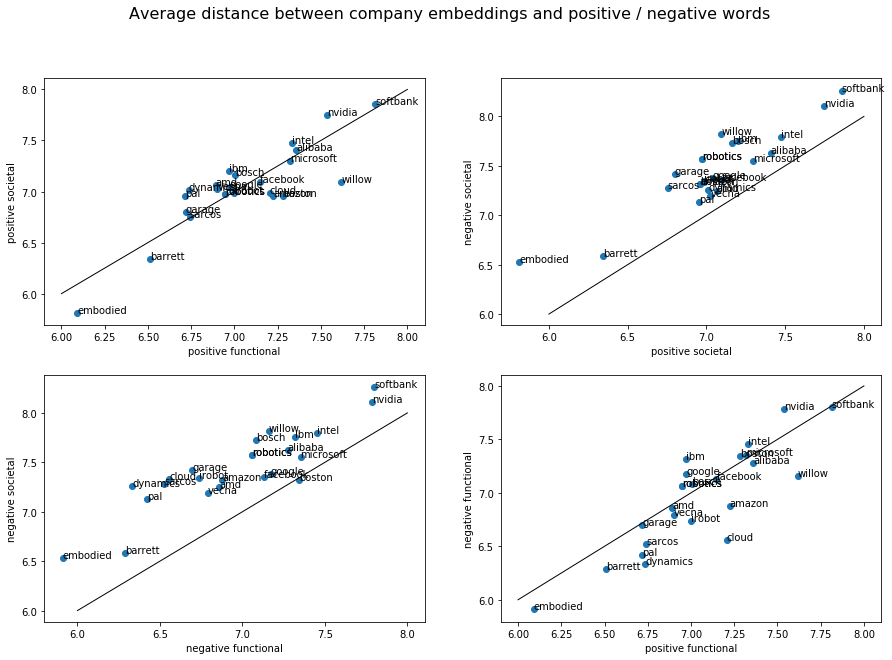

In [241]:
# plot distances of companies and positive / negative words
# the fact that there is a correlation is good:
# -> companies do not tend to be closer to negative words, than to positive words.
# -> if a company has a small distance to positive societal words, it also has a small distance to functional words
# however, companies like vecna seem to be polarising: they are associated with positive and negative words
# e.g. microsoft does not seem to be very polarising

# the black lines show where truly "neutral" companies would be. They are not regression lines!
line1 = 6
line2 = 8

fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(15, 10)

fig.suptitle("Average distance between company embeddings and positive / negative words", fontsize=16)

axes[0,0].scatter(p_f_comp[:,1], p_s_comp[:,1])
axes[0,0].set(xlabel = "positive functional", ylabel = "positive societal")
for i, name in enumerate(p_f_comp[:,0]):
    axes[0,0].annotate(name, (p_f_comp[i,1], p_s_comp[i,1]))
axes[0,0].plot([line1, line2], [line1, line2], 'k-', lw=1)

axes[1,0].scatter(n_f_comp[:,1], n_s_comp[:,1])
axes[1,0].set(xlabel = "negative functional", ylabel = "negative societal")
for i, name in enumerate(p_f_comp[:,0]):
    axes[1,0].annotate(name, (n_f_comp[i,1], n_s_comp[i,1]))
axes[1,0].plot([line1, line2], [line1, line2], 'k-', lw=1)

axes[1,1].scatter(p_f_comp[:,1], n_f_comp[:,1])
axes[1,1].set(xlabel = "positive functional", ylabel = "negative functional")
for i, name in enumerate(p_f_comp[:,0]):
    axes[1,1].annotate(name, (p_f_comp[i,1], n_f_comp[i,1]))
axes[1,1].plot([line1, line2], [line1, line2], 'k-', lw=1)

axes[0,1].scatter(p_s_comp[:,1], n_s_comp[:,1])
axes[0,1].set(xlabel = "positive societal", ylabel = "negative societal")
for i, name in enumerate(p_f_comp[:,0]):
    axes[0,1].annotate(name, (p_s_comp[i,1], n_s_comp[i,1]))
axes[0,1].plot([line1, line2], [line1, line2], 'k-', lw=1)
#plt.savefig('distances_companies.pdf')

### Plot frameworks

In [242]:
# remove entries that are not in dataset
n_f_frm = n_f_frm[p_f_frm[:,1].astype(bool)]
p_s_frm = p_s_frm[p_f_frm[:,1].astype(bool)]
n_s_frm = n_s_frm[p_f_frm[:,1].astype(bool)]
p_f_frm = p_f_frm[p_f_frm[:,1].astype(bool)]

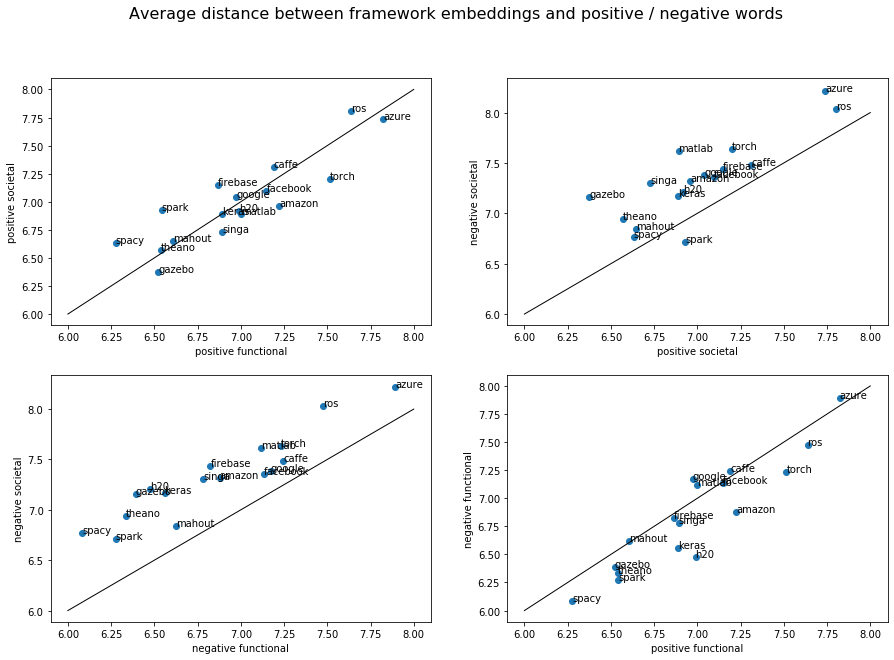

In [243]:
# plot distances of frameworks and positive / negative words
# the fact that there is a correlation is good:
# -> companies do not tend to be closer to negative words, than to positive words.
# -> if a company has a small distance to positive societal words, it also has a small distance to functional words
# however, companies like vecna seem to be polarising: they are associated with positive and negative words
# e.g. microsoft does not seem to be very polarising

# the black lines show where truly "neutral" companies would be. They are not regression lines!

line1 = 6
line2 = 8

fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(15, 10)

fig.suptitle("Average distance between framework embeddings and positive / negative words", fontsize=16)

axes[0,0].scatter(p_f_frm[:,1], p_s_frm[:,1])
axes[0,0].set(xlabel = "positive functional", ylabel = "positive societal")
for i, name in enumerate(p_f_frm[:,0]):
    axes[0,0].annotate(name, (p_f_frm[i,1], p_s_frm[i,1]))
axes[0,0].plot([line1, line2], [line1, line2], 'k-', lw=1)

axes[1,0].scatter(n_f_frm[:,1], n_s_frm[:,1])
axes[1,0].set(xlabel = "negative functional", ylabel = "negative societal")
for i, name in enumerate(p_f_frm[:,0]):
    axes[1,0].annotate(name, (n_f_frm[i,1], n_s_frm[i,1]))
axes[1,0].plot([line1, line2], [line1, line2], 'k-', lw=1)

axes[1,1].scatter(p_f_frm[:,1], n_f_frm[:,1])
axes[1,1].set(xlabel = "positive functional", ylabel = "negative functional")
for i, name in enumerate(p_f_frm[:,0]):
    axes[1,1].annotate(name, (p_f_frm[i,1], n_f_frm[i,1]))
axes[1,1].plot([line1, line2], [line1, line2], 'k-', lw=1)

axes[0,1].scatter(p_s_frm[:,1], n_s_frm[:,1])
axes[0,1].set(xlabel = "positive societal", ylabel = "negative societal")
for i, name in enumerate(p_f_frm[:,0]):
    axes[0,1].annotate(name, (p_s_frm[i,1], n_s_frm[i,1]))
axes[0,1].plot([line1, line2], [line1, line2], 'k-', lw=1)
#plt.savefig('distances_frameworks.pdf')

### 2nd approach: Sentiment direction through PCA

In [244]:
# perform pca to get directions of greatest variance = sentiment vectors
# PCA from simple word vectors (first PC of embeddings of functional / societal words)

pca = PCA(n_components=1)
principal_components = pca.fit(p_f_embed + n_f_embed)
functional_sentiment_direction = principal_components.components_[0]

principal_components = pca.fit(p_s_embed + n_s_embed)
society_sentiment_direction = principal_components.components_[0]

In [245]:
# print and save all words with their angles to society words and functional words
# angles around 90° are good.

angles_soc_func = []

#print("%-15s%-10s%10s" % ("", "Functional", "Societal"))
for word in companies + frameworks:
    try:
        angles_soc_func.append((word, angle_vec(embeddings_dict[word], functional_sentiment_direction), angle_vec(embeddings_dict[word], society_sentiment_direction)))
        #print("%-15s %-12.5s %-12.5s" % (angles_soc_func[-1]))
    except:
        angles_soc_func.append((word, None, None))
        #print(word)

angles_soc_func = np.array(angles_soc_func)

# filter out missing values
angles_soc_func = angles_soc_func[angles_soc_func[:,1] != np.array(None)]

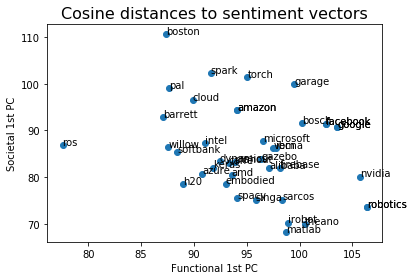

In [246]:
# Plot cosine distances

fig = plt.scatter(angles_soc_func[:,1],angles_soc_func[:,2])
plt.title("Cosine distances to sentiment vectors", size=16)
plt.xlabel("Functional 1st PC")
plt.ylabel("Societal 1st PC")
for i, name in enumerate(angles_soc_func[:,0]):
    plt.annotate(name, (angles_soc_func[i,1], angles_soc_func[i,2]))

In [48]:
# code to save values for reference, Dirty Hack
values = []
for word in companies + frameworks:
    try:
        values.append((word, angle_vec(embeddings_dict[word], functional_sentiment_direction), angle_vec(embeddings_dict[word], society_sentiment_direction)))
    except:
        values.append((word, None, None))

for i in values:
    pass#print(i)

In [6]:
# output of the above code, using the big embedding
data_40 = [('google', 81.58132197111395, 85.38306064697701) ,
('microsoft', 78.36052999867374, 77.0228811916095) ,
('amazon', 85.28186932924604, 85.933387302177) ,
('facebook', 88.9508847830484, 94.82193448350525) ,
('intel', 94.08120556760542, 78.0237077154805) ,
('nvidia', 90.33171314960701, 78.04591544990853) ,
('amd', 95.76111446345796, 79.08873679959837) ,
('deepmind', 78.92806778865676, 77.36679111129862) ,
('ibm', 85.45635063356441, 72.9587140422921) ,
('boston', 83.06760921028163, 94.60454058870201) ,
('dynamics', 80.47870836776725, 86.08774306505475) ,
('softbank', 84.02908052690933, 86.31367386642376) ,
('robotics', 72.8452740120154, 77.73747258185175) ,
('pal', 92.52405433992357, 87.40972688031428) ,
('robotics', 72.8452740120154, 77.73747258185175) ,
('willow', 92.7878038847685, 86.38526571500144) ,
('garage', 83.87941769241495, 87.08019065492876) ,
('alibaba', 89.0550431573287, 82.9957963645851) ,
('cloud', 83.55522729406717, 74.80600440144579) ,
('h20.ai', None, None) ,
('bosch', 76.4877570463206, 81.03077193341183) ,
('sphero', 72.51901639439613, 84.38930002249519) ,
('anybots', 75.6938960914384, 70.93412811473013) ,
('sarcos', 82.00368535641135, 75.24767581781794) ,
('barrett', 91.09864319928245, 98.02343856986285) ,
('petronics', None, None) ,
('dronesense', None, None) ,
('embodied', 89.79062034052514, 91.91506877285539) ,
('energid', 81.39549770473579, 82.52686880880094) ,
('irobot', 77.07486632081178, 86.59895044418644) ,
('myomo', 79.51423967820855, 82.5475819227478) ,
('vecna', 88.31910159971396, 84.05769716800604) ,
('sci-kit', None, None) ,
('tensorflow', 74.35898851036781, 65.92541033632993) ,
('theano', 90.68707080148246, 68.46808992119101) ,
('caffe', 81.23021449824734, 75.13977778039687) ,
('keras', 79.23473723063465, 77.70228314026521) ,
('torch', 78.74085813471446, 88.22241981047789) ,
('microsoftcntk', None, None) ,
('opencv', 77.94834113062669, 68.70011051763392) ,
('ros', 98.11706339713135, 84.5791374540656) ,
('opennn', 78.47516401181447, 74.83088873563786) ,
('mxnet', None, None) ,
('amazon', 85.28186932924604, 85.933387302177) ,
('matlab', 77.76507167583912, 70.68675064204588) ,
('accord.net', 76.014251989394, 73.09254826313085) ,
('spark', 82.49301733833002, 93.15978921747266) ,
('mllib', 74.23613598685112, 71.6953677491158) ,
('mlpack', 82.0229633843731, 75.50560541659044) ,
('apche', 85.77292370539041, 79.03605900575565) ,
('mahout', 93.71051699125363, 76.08611873701652) ,
('firebase', 86.77727029960036, 89.59668497799792) ,
('singa', 86.71639641299284, 79.83877368949364) ,
('azure', 78.23977991962062, 76.18484223521166) ,
('google', 81.58132197111395, 85.38306064697701) ,
('h20', 86.29645020702574, 81.54305714291549) ,
('yarp', 81.74074656605538, 79.96225260628653) ,
('mrpt', 74.81719981856898, 75.36126701799999) ,
('gazebo', 87.82167923735082, 80.21430713443701) ,
('orocos', 82.30713731088018, 69.75631515387113) ,
('spacy', 86.51560971466118, 87.6341989870835) ,
('facebook', 88.9508847830484, 94.82193448350525) ,
('gensim', 81.0125357525128, 72.65438778336181)]

In [247]:
# PCA from vectors of word pairs
# first PC of vectors of word pairs

pca2 = PCA(n_components=1)

principal_components2 = pca2.fit(functional_embed)
functional_sentiment_direction2 = principal_components2.components_[0]

principal_components2 = pca2.fit(society_embed)
society_sentiment_direction2 = principal_components2.components_[0]

In [248]:
# print and save all words with their angles to society words and functional words
# angles around 90° are good.

angles_soc_func2 = []

#print("%-15s%-10s%10s" % ("", "Functional", "Societal"))
for word in companies + frameworks:
    try:
        angles_soc_func2.append((word, angle_vec(embeddings_dict[word], functional_sentiment_direction2), angle_vec(embeddings_dict[word], society_sentiment_direction2)))
        #print("%-15s %-12.5s %-12.5s" % angles_soc_func2[-1])
    except:
        angles_soc_func2.append((word, None, None))
        #print(word)

angles_soc_func2 = np.array(angles_soc_func2)

# filter out missing values
angles_soc_func2 = angles_soc_func2[angles_soc_func2[:,1] != np.array(None)]

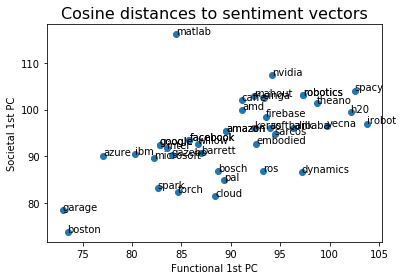

In [249]:
# Plot cosine distances

fig = plt.scatter(angles_soc_func2[:,1],angles_soc_func2[:,2])
plt.title("Cosine distances to sentiment vectors", size=16)
plt.xlabel("Functional 1st PC")
plt.ylabel("Societal 1st PC")
for i, name in enumerate(angles_soc_func2[:,0]):
    plt.annotate(name, (angles_soc_func2[i,1], angles_soc_func2[i,2]))

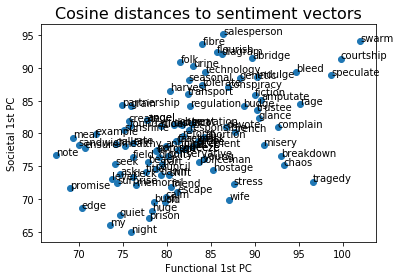

In [250]:
# print and save all random words with their angles to society words and functional words
# angles around 90° are good.

angles_soc_func_random = []

#print("%-15s%-10s%10s" % ("", "Functional", "Societal"))
for word in random_words:
    angles_soc_func_random.append((word, angle_vec(embeddings_dict[word], functional_sentiment_direction2), angle_vec(embeddings_dict[word], society_sentiment_direction2)))
    #print("%-15s %-12.5s %-12.5s" % angles_soc_func_random[-1])
    
angles_soc_func_random = np.array(angles_soc_func_random)
random_values = angles_soc_func_random[:,1:3].astype(np.float)
random_names = angles_soc_func_random[:,0]
# Plot cosine distances

fig = plt.scatter(random_values[:,0],random_values[:,1])
plt.title("Cosine distances to sentiment vectors", size=16)
plt.xlabel("Functional 1st PC")
plt.ylabel("Societal 1st PC")
for i, name in enumerate(random_names):
    plt.annotate(name, (random_values[i,0], random_values[i,1]))

In [183]:
# code to save values for reference (dirty hack to avoid saving and loading files)
values2 = []
for word in companies + frameworks:
    try:
        values2.append((word, angle_vec(embeddings_dict[word], functional_sentiment_direction2), angle_vec(embeddings_dict[word], society_sentiment_direction2)))
    except:
        values2.append((word, None, None))

for i in values2:
    pass#print(i, ",")

In [8]:
data_40_2 = [('google', 87.80729601569945, 101.2616002084186) ,
('microsoft', 92.22947565432817, 110.07164865347103) ,
('amazon', 84.22298519162408, 98.37073957342788) ,
('facebook', 91.19328028084082, 91.51849020253316) ,
('intel', 94.42998450709902, 103.26136216765518) ,
('nvidia', 93.46834033729112, 103.31779371734459) ,
('amd', 96.12119166958179, 102.65396343584038) ,
('deepmind', 93.21084544177033, 106.0669040520475) ,
('ibm', 94.03396988383408, 107.96697749573657) ,
('boston', 85.78426620602532, 84.25549514851684) ,
('dynamics', 101.48977662302497, 99.79254005180135) ,
('softbank', 85.47946255530569, 96.38697521969269) ,
('robotics', 91.68728435086771, 105.52983858549132) ,
('pal', 89.9367749521248, 92.88737420651849) ,
('robotics', 91.68728435086771, 105.52983858549132) ,
('willow', 88.20087430511555, 88.78103146006853) ,
('garage', 84.01158632758941, 78.51120196992503) ,
('alibaba', 86.58470898717835, 91.20183815662308) ,
('cloud', 94.23950569972763, 102.21021603083739) ,
('h20.ai', None, None) ,
('bosch', 86.13300389051822, 91.6526205537132) ,
('sphero', 78.37479529498589, 94.67425651443624) ,
('anybots', 93.58907725450175, 107.57486805809884) ,
('sarcos', 93.12075022620122, 102.3142291626249) ,
('barrett', 90.83283905628821, 82.86276948744549) ,
('petronics', None, None) ,
('dronesense', None, None) ,
('embodied', 105.61961368407982, 95.21941810702579) ,
('energid', 92.05817894014919, 101.3757289172342) ,
('irobot', 90.21114339159243, 93.85870258248171) ,
('myomo', 86.759551734634, 100.41563664270775) ,
('vecna', 94.47565428101133, 93.75927845084506) ,
('sci-kit', None, None) ,
('tensorflow', 91.32465113521452, 116.59238909086451) ,
('theano', 94.5420832646147, 106.78243963831068) ,
('caffe', 80.3433866463473, 95.21042232629418) ,
('keras', 85.64530001808315, 98.65104151898463) ,
('torch', 78.73021722446897, 88.20401403330786) ,
('microsoftcntk', None, None) ,
('opencv', 86.4819957335614, 111.75579056042733) ,
('ros', 98.6049338762749, 98.51974202542617) ,
('opennn', 93.20902951597955, 107.82866292336239) ,
('mxnet', None, None) ,
('amazon', 84.22298519162408, 98.37073957342788) ,
('matlab', 89.77010404797144, 115.21627303053977) ,
('accord.net', 87.9976172592865, 111.42730847075244) ,
('spark', 92.82180187353768, 89.45442769250474) ,
('mllib', 88.78843620486964, 109.96137941920102) ,
('mlpack', 88.26684272522562, 107.59817568289475) ,
('apche', 88.87912163757164, 101.82474544321359) ,
('mahout', 98.75995334973769, 104.13602937843352) ,
('firebase', 90.76320736267996, 95.3263933014051) ,
('singa', 91.57197742189429, 101.73901998597614) ,
('azure', 88.16905290339425, 97.54895918444824) ,
('google', 87.80729601569945, 101.2616002084186) ,
('h20', 87.21967183950501, 96.55250398915561) ,
('yarp', 89.09333457641748, 105.49539115557148) ,
('mrpt', 89.2149421989122, 110.31942666080192) ,
('gazebo', 78.12644521584215, 83.15024196561349) ,
('orocos', 93.09475342441513, 109.4087414431444) ,
('spacy', 91.52630880672592, 89.23446259845957) ,
('facebook', 91.19328028084082, 91.51849020253316) ,
('gensim', 96.06760896091329, 112.06899783278402)]

In [133]:
print(angle_vec(embeddings_dict["war"], society_sentiment_direction2))
print(angle_vec(embeddings_dict["bad"], society_sentiment_direction2))

87.32351279397706
90.72444551618975


In [170]:
angle_vec(embeddings_dict["king"] - embeddings_dict["queen"], embeddings_dict["secretary"] - embeddings_dict["coach"])

96.1801

In [159]:
find_closest_embeddings(embeddings_dict["dachshund"])

KeyboardInterrupt: 

In [75]:
# average absolute value of the distance between 90 degrees and the angle of the company vectors to the "society" direction
# measure of how biased the embedding is (between 0 and 90)

avg_societal_bias = 0
avg_functional_bias = 0
counter = 0

for line in angles_soc_func_random:
    angle_soc = line[2]
    angle_func = line[1]
    
    if angle_soc: # check if there is data for the company / framework
        counter += 1
        avg_societal_bias += abs(90 - angle_soc)
        avg_functional_bias += abs(90 - angle_func)
    
avg_functional_bias /= counter
avg_societal_bias /= counter

print("functional bias: ", avg_functional_bias, "societal bias: " , avg_societal_bias)
# CoNLL17: functional bias:  3.9495742106369267 societal bias:  11.044453649519795
# GloVe: functional bias:  5.988432694507943 societal bias:  7.173770563704972
# Random: functional bias:  9.304432622842576 societal bias:  10.992649064172603

functional bias:  9.304432622842576 societal bias:  10.992649064172603
